# 1. Giới thiệu Project 
**Coronavirus** là một họ vi-rút có thể gây bệnh, có thể khiến *cảm lạnh thông thường* và *ho* trở bệnh nặng hơn. **Hội chứng hô hấp Trung Đông (MERS-CoV)** và **Hội chứng hô hấp cấp tính nặng (SARS-CoV)** là những trường hợp nghiêm trọng mà thế giới phải đối mặt.<br> **SARS-CoV-2 (n-coronavirus)** SARS-CoV-2 (n-coronavirus) là loại virus mới thuộc họ coronavirus, *được phát hiện* lần đầu vào năm 2019, chưa được xác định ở người trước đây.

Nó là một loại vi-rút *truyền nhiễm* bắt đầu từ **Vũ Hán** vào **tháng 12 năm 2019**. Sau này, nó được **WHO** tuyên bố là **đại dịch** do tốc độ lây lan cao trên toàn thế giới. Hiện tại (ngày 10 tháng 6 năm 2020), đại dịch này đã khiến hơn *500 nghìn* người chết trên toàn cầu.<br>

Đại dịch đang lan rộng trên toàn thế giới; điều quan trọng bây giờ là hiểu rõ hơn về sự lây lan này. Notebook này đã nỗ lực phân tích dữ liệu tích lũy của các trường hợp đã xác nhận, trường hợp tử vong và hồi phục theo thời gian.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# 2. Download và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, thư viện này cung cấp các hàm chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số thư viện trực quan hóa trong Python.

Bỏ chú thích và cài đặt một số thư viện nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:
!pip install pycountry_convert 
!pip install folium
!pip install seaborn
!pip install plotly

In [2]:
#Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
from pycountry_convert import country_mappings as cm
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Download tập dữ liệu

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE. Tuy nhiên trong Asm này, học viên chỉ cần xử lý từ ngày đầu đến ngày 8/4/2021.

In [3]:
# Dữ liệu toàn cầu

confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
# Nhận code bạn tại đây để confirmed_df chỉ chưa dữ liệu đến ngày 8/4/2021

confirmed_df = confirmed_df.loc[:, :'8/4/21']
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 565 columns]

In [5]:
# Nhận code bạn tại đây để deaths_df chỉ chưa dữ liệu đến ngày 8/4/2021

deaths_df = deaths_df.loc[:, :'8/4/21']
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...     6477     6515     6577   
1        0        0        0        0  ...     2456     2456     2457   
2        0        0        0        0  ...     4087     4112     4161   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      991      994     1000   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0     6615     6677     6708    6737    6774    6804    6836  
1     2457     2457     2457    2457    2457    2457    2457  
2     4189     4219     4254    4291    4329    4370    4404  
3      127      128      128     128     128     128     128  
4     1003     1008     1011    1016    1018    1022    1026  

[5 rows x 565 columns]

In [6]:
# Nhận code bạn tại đây để recoveries_df chỉ chưa dữ liệu đến ngày 8/4/2021

recoveries_df = recoveries_df.loc[:, :'8/4/21']
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...    82586    82586    82586   
1        0        0        0        0  ...   130152   130166   130174   
2        0        0        0        0  ...   111322   112050   112900   
3        0        0        0        0  ...    14077    14113    14113   
4        0        0        0        0  ...    35686    35742    35964   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0    82586    82586    82586   82586   82586   82586   82586  
1   130187   130205   130222  130243  130256  130291  130314  
2   113707   114531   115276  116009  116770  117557  118409  
3    14180    14210    14210   14210   14296   14348   14380  
4    36025    36708    37255   37397   38360   39389   39582  

[5 rows x 565 columns]

#  4. Tìm hiểu dữ liệu 


    Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu

In [7]:
# Nhập code ở đây:

print('First day of confirmed_df:',(confirmed_df.keys()[4]))
print('First day of deaths_df:',(deaths_df.keys()[4]))
print('First day of recoveries_df:',(recoveries_df.keys()[4]))

First day of confirmed_df: 1/22/20
First day of deaths_df: 1/22/20
First day of recoveries_df: 1/22/20


    Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 DataFrames

In [8]:
# Nhập code ở đây:

print('Last day of confirmed_df:',(confirmed_df.keys()[-1]))
print('Last day of deaths_df:',(deaths_df.keys()[-1]))
print('Last day of recoveries_df:',(recoveries_df.keys()[-1]))

Last day of confirmed_df: 8/4/21
Last day of deaths_df: 8/4/21
Last day of recoveries_df: 8/4/21


    Xác định có bao nhiêu quốc gia trong dữ liệu này

In [9]:
#Check gia tri null cua cot Country/Region:

test = confirmed_df['Country/Region'].isnull()
confirmed_df[test]

Empty DataFrame
Columns: [Province/State, Country/Region, Lat, Long, 1/22/20, 1/23/20, 1/24/20, 1/25/20, 1/26/20, 1/27/20, 1/28/20, 1/29/20, 1/30/20, 1/31/20, 2/1/20, 2/2/20, 2/3/20, 2/4/20, 2/5/20, 2/6/20, 2/7/20, 2/8/20, 2/9/20, 2/10/20, 2/11/20, 2/12/20, 2/13/20, 2/14/20, 2/15/20, 2/16/20, 2/17/20, 2/18/20, 2/19/20, 2/20/20, 2/21/20, 2/22/20, 2/23/20, 2/24/20, 2/25/20, 2/26/20, 2/27/20, 2/28/20, 2/29/20, 3/1/20, 3/2/20, 3/3/20, 3/4/20, 3/5/20, 3/6/20, 3/7/20, 3/8/20, 3/9/20, 3/10/20, 3/11/20, 3/12/20, 3/13/20, 3/14/20, 3/15/20, 3/16/20, 3/17/20, 3/18/20, 3/19/20, 3/20/20, 3/21/20, 3/22/20, 3/23/20, 3/24/20, 3/25/20, 3/26/20, 3/27/20, 3/28/20, 3/29/20, 3/30/20, 3/31/20, 4/1/20, 4/2/20, 4/3/20, 4/4/20, 4/5/20, 4/6/20, 4/7/20, 4/8/20, 4/9/20, 4/10/20, 4/11/20, 4/12/20, 4/13/20, 4/14/20, 4/15/20, 4/16/20, 4/17/20, 4/18/20, 4/19/20, 4/20/20, 4/21/20, 4/22/20, 4/23/20, 4/24/20, 4/25/20, 4/26/20, ...]
Index: []

[0 rows x 565 columns]

In [10]:
# Nhập code ở đây:

print('Number of countries in confirmed_df:', confirmed_df['Country/Region'].nunique())
print('Number of countries in deaths_df:', deaths_df['Country/Region'].nunique())
print('Number of countries in recoveries_df:', recoveries_df['Country/Region'].nunique())

Number of countries in confirmed_df: 201
Number of countries in deaths_df: 201
Number of countries in recoveries_df: 201


    Tính tổng số ngày có trong 3 bộ dữ liệu
  



In [11]:
# Nhập code ở đây:

print('Total number of days in confirmed_df:', len(confirmed_df.keys()[4:]))
print('Total number of days in deaths_df:', len(deaths_df.keys()[4:]))
print('Total number of days in recoveries_df:', len(recoveries_df.keys()[4:]))

Total number of days in confirmed_df: 561
Total number of days in deaths_df: 561
Total number of days in recoveries_df: 561


    Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không

In [12]:
# Nhập code ở đây (confirmed_df):

confirmed_df[confirmed_df['Country/Region'].duplicated()]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        3        4  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21   8/1/21   8/2/21  \
10      8118     8294     8531     8703     8915     9153     9360     9562   
11       192      192      197      197      197      199      200      200   
12      1770     1790     1791     1793     1800     1809     1824     1840   
13       856      857      859      859      859      859      862      863   
14       234      234      234      234      234      234      234      234   
..       ...      ...      ...      ...      ...      ...      ...      ...   
274       21       21       21       21       21       21       21       21   
275        0        0        0        0        0        0        0        0   
276        4        4        4        4        4        4        4        4   
277     2466     2466     2473     2479     2481     2484     2486     2486   
278  5722298  5745526  5770928  5801561  5830774  5856528  5880667  5902354   

      8/3/21   8/4/21  
10      9795    10063  
11       198      198  
12      1859     1886  
13       866      866  
14       234      235  
..       ...      ...  
274       21       21  
275        0        0  
276        4        4  
277     2486     2486  
278  5923820  5952756  

[88 rows x 565 columns]

In [13]:
# Nhập code ở đây (deaths_df):

deaths_df[deaths_df['Country/Region'].duplicated()]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
274                                    Montserrat  United Kingdom  16.742498   
275                              Pitcairn Islands  United Kingdom -24.376800   
276  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
277                      Turks and Caicos Islands  United Kingdom  21.694000   
278                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
274  -62.187366        0        0        0        0        0        0  ...   
275 -128.324200        0        0        0        0        0        0  ...   
276  -14.355900        0        0        0        0        0        0  ...   
277  -71.797900        0        0        0        0        0        0  ...   
278   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  \
10        66       65       67       67       68       68      69      69   
11         0        0        0        0        0        0       0       0   
12         7        7        7        7        7        7       7       7   
13         4        4        4        4        4        4       4       4   
14        13       13       13       13       13       13      13      13   
..       ...      ...      ...      ...      ...      ...     ...     ...   
274        1        1        1        1        1        1       1       1   
275        0        0        0        0        0        0       0       0   
276        0        0        0        0        0        0       0       0   
277       18       18       18       18       18       18      18      18   
278   156104   156181   156265   156353   156458   156550  156647  156739   

     8/3/21  8/4/21  
10       71      76  
11        0       0  
12        7       7  
13        4       4  
14       13      13  
..      ...     ...  
274       1       1  
275       0       0  
276       0       0  
277      18      18  
278  156819  156911  

[88 rows x 565 columns]

In [14]:
# Nhập code ở đây (recoveries_df):

recoveries_df[recoveries_df['Country/Region'].duplicated()]

Province/State  Country/Region        Lat  \
10                                New South Wales       Australia -33.868800   
11                             Northern Territory       Australia -12.463400   
12                                     Queensland       Australia -27.469800   
13                                South Australia       Australia -34.928500   
14                                       Tasmania       Australia -42.882100   
..                                            ...             ...        ...   
259                                    Montserrat  United Kingdom  16.742498   
260                              Pitcairn Islands  United Kingdom -24.376800   
261  Saint Helena, Ascension and Tristan da Cunha  United Kingdom  -7.946700   
262                      Turks and Caicos Islands  United Kingdom  21.694000   
263                                           NaN  United Kingdom  55.378100   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  \
10   151.209300        0        0        0        0        0        0  ...   
11   130.845600        0        0        0        0        0        0  ...   
12   153.025100        0        0        0        0        0        0  ...   
13   138.600700        0        0        0        0        0        0  ...   
14   147.327200        0        0        0        0        0        0  ...   
..          ...      ...      ...      ...      ...      ...      ...  ...   
259  -62.187366        0        0        0        0        0        0  ...   
260 -128.324200        0        0        0        0        0        0  ...   
261  -14.355900        0        0        0        0        0        0  ...   
262  -71.797900        0        0        0        0        0        0  ...   
263   -3.436000        0        0        0        0        0        0  ...   

     7/26/21  7/27/21  7/28/21  7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  \
10         0        0        0        0        0        0       0       0   
11       189      190      190      190      191      191     191     191   
12      1715     1717     1717     1720     1720     1725    1727    1727   
13       826      827      827      829      829      830     830     831   
14       221      221      221      221      221      221     221     221   
..       ...      ...      ...      ...      ...      ...     ...     ...   
259       19       19       19       19       19       19      19      19   
260        0        0        0        0        0        0       0       0   
261        4        4        4        4        4        4       4       4   
262     2418     2425     2426     2431     2431     2431    2433    2433   
263        0        0        0        0        0        0       0       0   

     8/3/21  8/4/21  
10        0       0  
11      193     193  
12     1727    1727  
13      835     841  
14      221     221  
..      ...     ...  
259      19      19  
260       0       0  
261       4       4  
262    2433    2433  
263       0       0  

[73 rows x 565 columns]

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố


In [15]:
# Nhập code ở đây (recoveries_df):

recoveries_df['Country/Region'].drop_duplicates().values

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

    Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố

In [16]:
# Nhập code ở đây (recoveries_df):

recoveries_df[recoveries_df['Province/State'].notnull()]['Country/Region'].drop_duplicates().values

array(['Australia', 'China', 'Denmark', 'France', 'Netherlands',
       'New Zealand', 'United Kingdom'], dtype=object)

    Xác định quốc gia và ngày mà có số ca Covid nhiều nhất

In [17]:
# Nhập code ở đây:

max_number = confirmed_df.iloc[:, 4:].values.max()
max_country = confirmed_df.loc[confirmed_df.iloc[:, 4:].max(axis = 1).idxmax()]['Country/Region']
max_date = confirmed_df.iloc[:, 4:].max(axis = 0).idxmax()
print(max_country,'-',max_date,'-',max_number)

US - 8/4/21 - 35460776


    Xác định quốc gia có tổng số người mất do Covid là nhiều nhất

In [18]:
# Nhập code ở đây:

new_deaths_df = deaths_df.copy()
new_deaths_df['Total_deaths'] = new_deaths_df.iloc[:, 4:].sum(axis=1)
print(new_deaths_df.loc[new_deaths_df['Total_deaths'].idxmax()]['Country/Region'],'-',new_deaths_df['Total_deaths'].max())

US - 163218805


    Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam


In [19]:
# Nhập code ở đây:

VN_confirmed = confirmed_df[confirmed_df['Country/Region']=='Vietnam'].iloc[0][-1]
VN_deaths = deaths_df[deaths_df['Country/Region']=='Vietnam'].iloc[0][-1]
VN_recoveries = recoveries_df[recoveries_df['Country/Region']=='Vietnam'].iloc[0][-1]

print('Tong so ca Covit:', VN_confirmed)
print('Tong so ca tu vong:', VN_deaths)
print('Tong so ca phuc hoi:', VN_recoveries)
print('Tong so ca con Covid:', VN_confirmed - VN_deaths - VN_recoveries)

Tong so ca Covit: 181756
Tong so ca tu vong: 2327
Tong so ca phuc hoi: 54332
Tong so ca con Covid: 125097


#  5. Phân tích toàn cầu

## Bài toán 1

    Tính số lượng tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn đang mắc Covid theo thời gian (đơn vị ngày).

In [20]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Nhập code ở đây:

for i in dates:
    total_cases.append(confirmed[i].sum())
    total_deaths.append(deaths[i].sum())
    total_recovered.append(recoveries[i].sum())
    m_rate = round(((deaths[i].sum()) / (confirmed[i].sum())) * 100, 2)
    r_rate = round(((recoveries[i].sum()) / (confirmed[i].sum())) * 100, 2)
    mortality_rate.append(m_rate)
    recovery_rate.append(r_rate)
    total_active.append((confirmed[i].sum()) - (deaths[i].sum()) - (recoveries[i].sum()))

In [21]:
# Tống số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và số ca còn mắc Covid cho tới giờ.

print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Hiển thị số lượng và log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) bằng cách sử dụng biểu đồ đường.

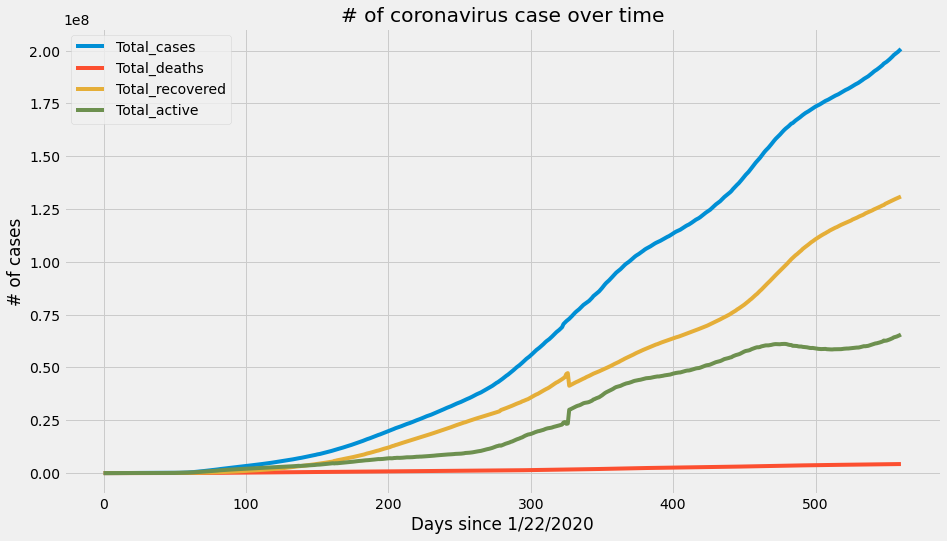

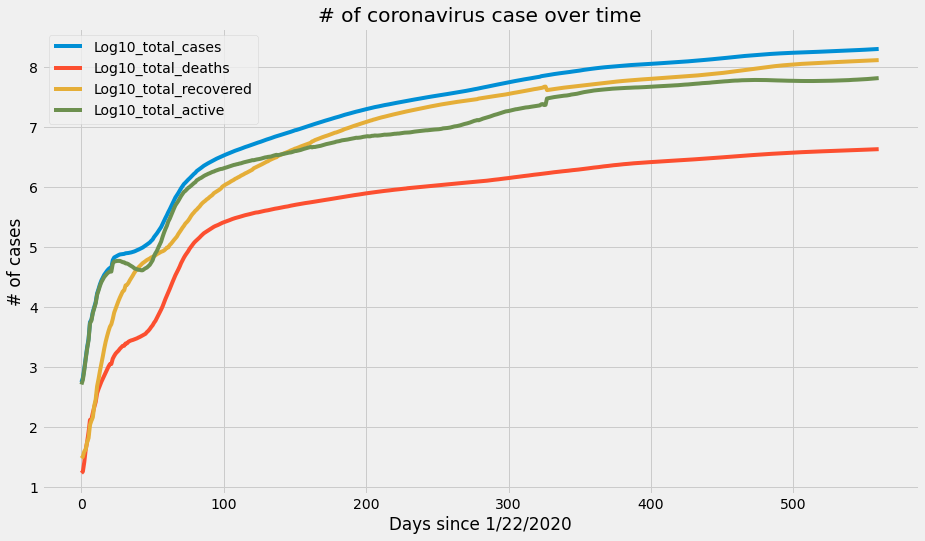

In [22]:
#Nhập code ở đây:

# Tạo dataframe chứa tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi, tổng số ca còn mắc covid
# theo thời gian đơn vị ngày
df_2 = pd.DataFrame({'Total_cases':total_cases,
                     'Total_deaths':total_deaths,
                     'Total_recovered':total_recovered,
                     'Total_active':total_active
                    })

# Vẽ biểu đồ đường hiển thị số lượng của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi, tổng số ca còn mắc covid
df_2.plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus case over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Thêm cột chứa dữ log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi, tổng số ca còn mắc covid
df_2['Log10_total_cases'] = np.log10(df_2['Total_cases'])
df_2['Log10_total_deaths'] = np.log10(df_2['Total_deaths'])
df_2['Log10_total_recovered'] = np.log10(df_2['Total_recovered'])
df_2['Log10_total_active'] = np.log10(df_2['Total_active'])

# Vẽ biểu đồ đường hiển thị log(10) của tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi, tổng số ca còn mắc covid 
df_2[['Log10_total_cases','Log10_total_deaths','Log10_total_recovered','Log10_total_active']].plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus case over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()


## Bài toán 3
    Hiển thị tổng số trường hợp Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc covid theo thời gian (đơn vị ngày) ở 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ đường.

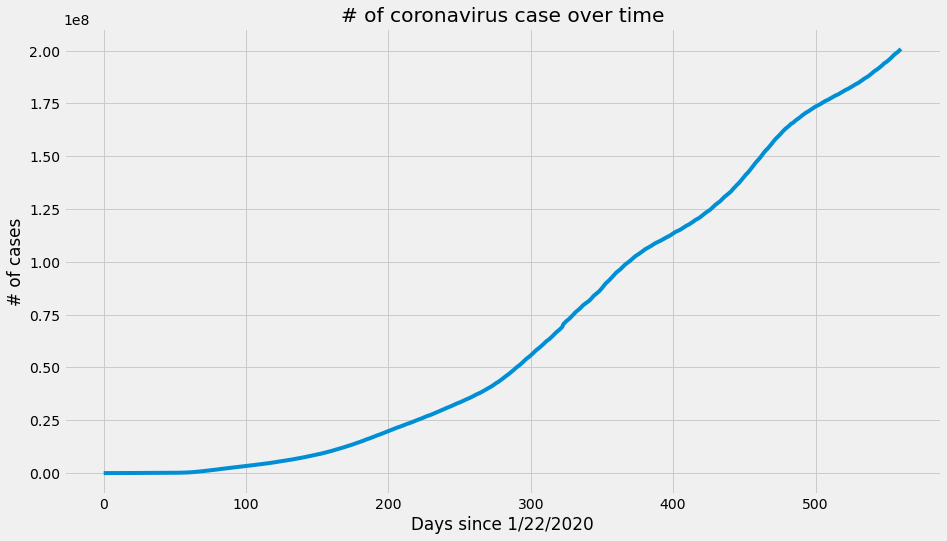

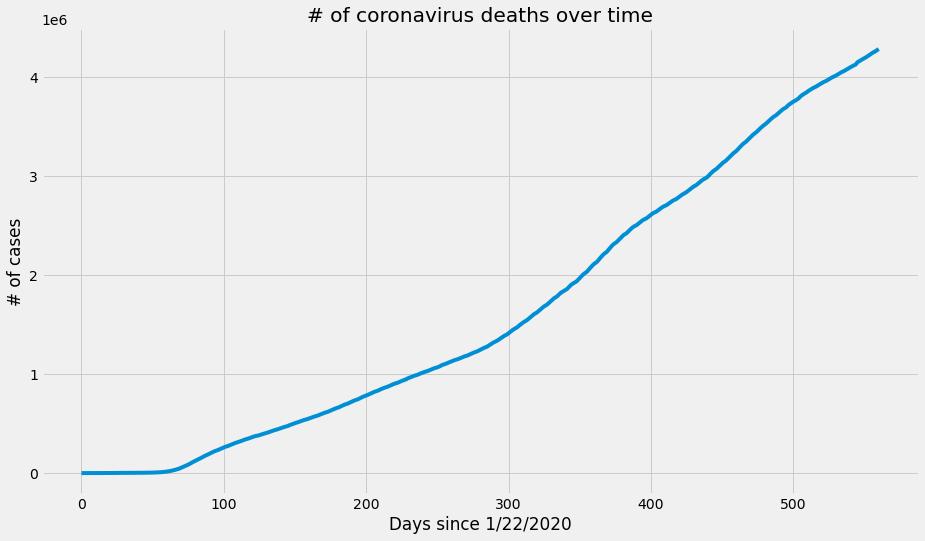

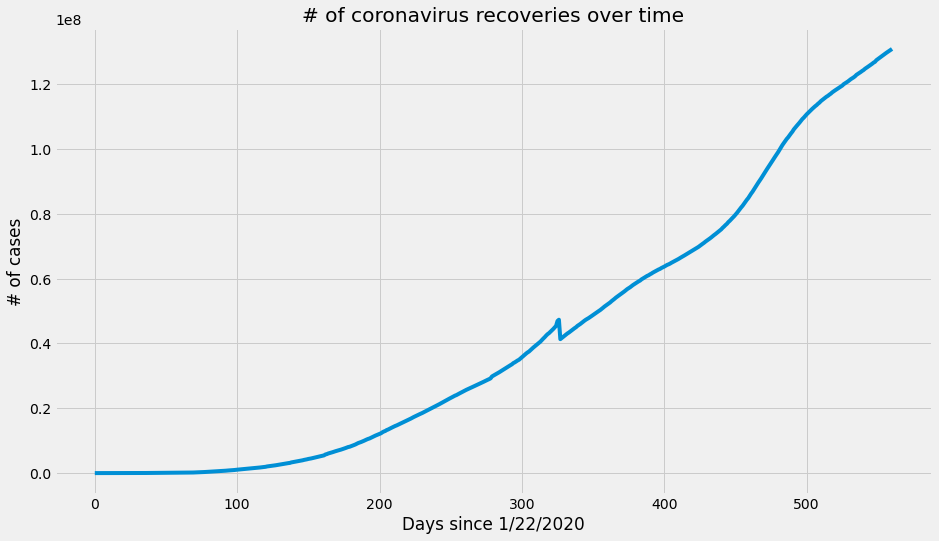

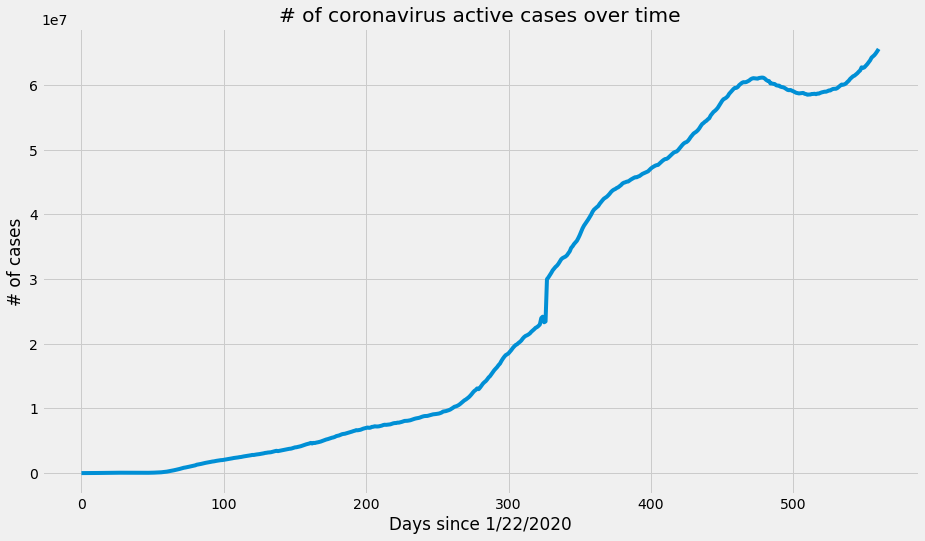

In [23]:
#Nhập code ở đây:

# Vẽ biểu đồ đường hiển thị tổng số trường hợp Covid theo thời gian đơn vị ngày
df_2['Total_cases'].plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus case over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường hiển thị tổng số ca tử vong theo thời gian đơn vị ngày
df_2['Total_deaths'].plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus deaths over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường hiển thị tổng số ca phục hồi theo thời gian đơn vị ngày
df_2['Total_recovered'].plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus recoveries over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường hiển thị tổng số ca còn mắc Covid theo thời gian đơn vị ngày
df_2['Total_active'].plot(kind='line', figsize =(14,8))
plt.title('# of coronavirus active cases over time')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

## Bài toán 4
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày).

In [24]:
#Nhập code ở đây:

increases_case_4 = []
increases_death_4 = []
increases_recovered_4 = []
increases_active_4 = []

for i in adjusted_dates:
    if i == 0: # Ngày đầu tiên nên số lượng gia tăng là 0
        increases_case_4.append(i)
        increases_death_4.append(i)
        increases_recovered_4.append(i)
        increases_active_4.append(i)
    else: 
        increases_case_4.append(total_cases[i] - total_cases[i-1])
        increases_death_4.append(total_deaths[i] - total_deaths[i-1])
        increases_recovered_4.append(total_recovered[i] - total_recovered[i-1])
        increases_active_4.append(total_active[i] - total_active[i-1])

# Tạo dataframe chứa số lượng gia tăng hằng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, 
# tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày)        
df_4 = pd.DataFrame({'Increases_case':increases_case_4, 
                     'Increases_death':increases_death_4,
                     'Increases_recovered':increases_recovered_4,
                     'Increases_active':increases_active_4
                    })
df_4

Increases_case  Increases_death  Increases_recovered  Increases_active
0                 0                0                    0                 0
1               100                1                    2                97
2               287                8                    7               272
3               493               16                    3               474
4               683               14                   14               655
..              ...              ...                  ...               ...
556          517345             8844               303929            204572
557          483068             7419               289178            186471
558          571103             8151               283144            279808
559          634275            10353               304468            319454
560          680458            10492               317060            352906

[561 rows x 4 columns]

## Bài toán 5
    Tính số lượng gia tăng hàng ngày về: tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian (đơn vị ngày ở 4 biểu đồ riêng biệt).

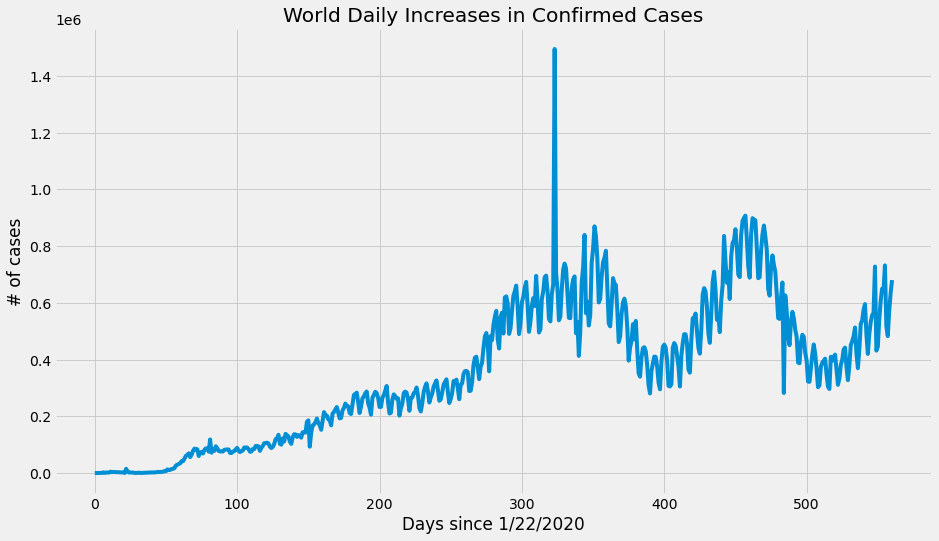

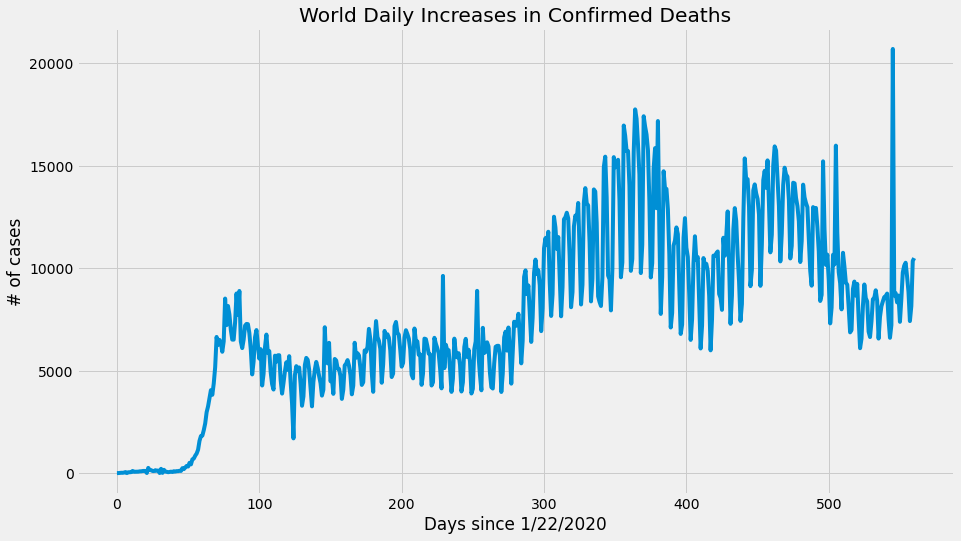

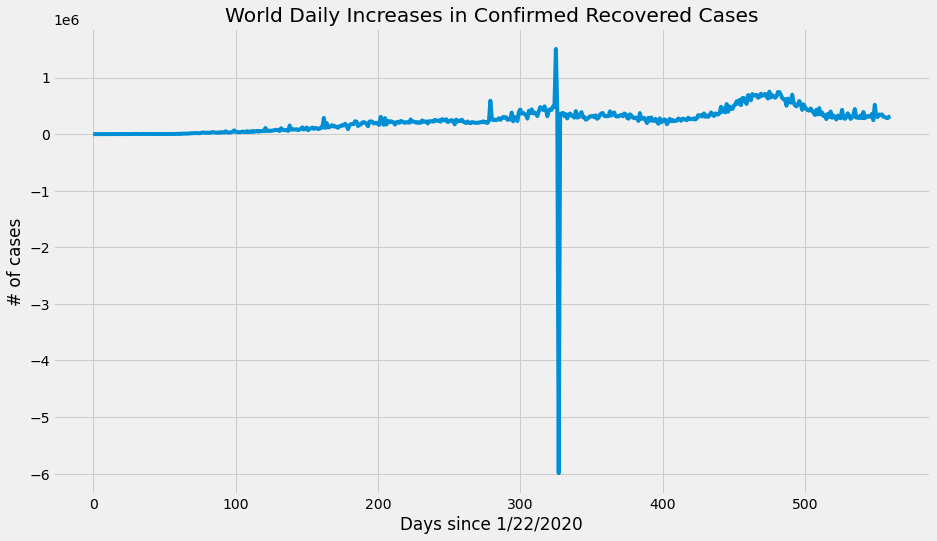

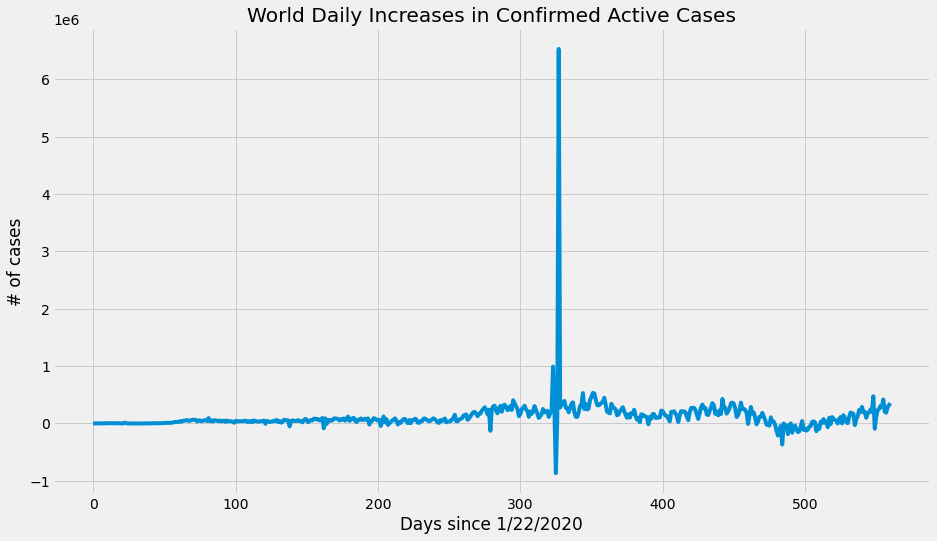

In [25]:
#Nhập code ở đây:

# Vẽ biểu đồ đường thể hiện số lượng gia tăng hằng ngày về tổng số ca mắc Covid
df_4['Increases_case'].plot(kind='line', figsize =(14,8))
plt.title('World Daily Increases in Confirmed Cases')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường thể hiện số lượng gia tăng hằng ngày về tổng số ca tử vong
df_4['Increases_death'].plot(kind='line', figsize =(14,8))
plt.title('World Daily Increases in Confirmed Deaths')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường thể hiện số lượng gia tăng hằng ngày về tổng số ca phục hồi
df_4['Increases_recovered'].plot(kind='line', figsize =(14,8))
plt.title('World Daily Increases in Confirmed Recovered Cases')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

# Vẽ biểu đồ đường thể hiện số lượng gia tăng hằng ngày về tổng số ca còn mắc Covid
df_4['Increases_active'].plot(kind='line', figsize =(14,8))
plt.title('World Daily Increases in Confirmed Active Cases')
plt.ylabel('# of cases')
plt.xlabel('Days since 1/22/2020')
plt.show()

## Bài toán 6
    Tính phần trăm tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo thời gian.

In [26]:
#Nhập code ở đây:

# Đã tính ở bài toán 1
mortality_rate
recovery_rate

[5.39,
 4.87,
 4.13,
 2.92,
 2.64,
 2.22,
 1.94,
 2.06,
 1.76,
 2.27,
 2.38,
 2.84,
 3.15,
 3.59,
 4.09,
 4.85,
 5.86,
 7.05,
 8.08,
 9.23,
 10.45,
 11.39,
 10.42,
 12.05,
 13.61,
 15.25,
 17.18,
 19.1,
 21.31,
 23.85,
 24.59,
 29.12,
 29.62,
 31.71,
 34.71,
 37.34,
 40.23,
 43.63,
 46.25,
 48.33,
 50.46,
 51.86,
 53.67,
 54.85,
 54.74,
 54.95,
 55.18,
 54.68,
 54.1,
 52.95,
 51.27,
 47.96,
 46.15,
 45.1,
 42.63,
 40.75,
 38.59,
 34.96,
 32.07,
 30.05,
 28.86,
 25.77,
 25.49,
 23.94,
 22.79,
 21.82,
 20.83,
 20.51,
 20.76,
 20.45,
 20.2,
 20.25,
 20.1,
 20.81,
 20.72,
 20.81,
 21.45,
 22.21,
 22.59,
 22.72,
 23.25,
 22.8,
 23.37,
 23.63,
 24.5,
 24.86,
 25.05,
 25.23,
 25.75,
 25.85,
 26.44,
 26.75,
 26.99,
 27.97,
 28.12,
 28.42,
 28.67,
 29.04,
 29.66,
 30.88,
 31.2,
 31.67,
 31.93,
 32.19,
 32.48,
 32.93,
 33.19,
 33.35,
 33.98,
 34.18,
 34.68,
 34.85,
 35.46,
 35.59,
 35.9,
 36.39,
 36.65,
 37.07,
 37.41,
 37.8,
 38.02,
 39.31,
 39.58,
 39.92,
 40.44,
 40.75,
 41.13,
 41.43,
 41.89

## Bài toán 7
**7.1** 

    Hiển thị tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

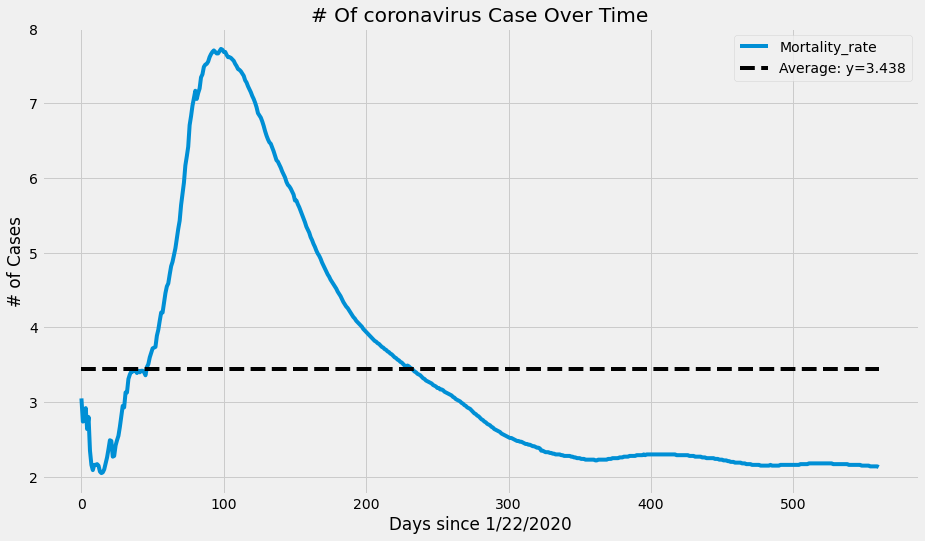

In [27]:
#Nhập code ở đây:

# Tạo dataframe chứa tỷ lệ tử vong theo thời gian (đơn vị ngày)
df_71 = pd.DataFrame({'Mortality_rate':mortality_rate})

# Tạo thêm cột dữ liệu cho tỷ lệ tử vong trung bình theo thời gian
   # Tên cột: name
name = str('Average: y='+ str(round(np.nanmean(df_71['Mortality_rate']),3)))
   # Thêm dữ liệu tỷ lệ tử vong trung bình vào cột:
df_71[name] = round(np.nanmean(df_71['Mortality_rate']),3)

# Vẽ biểu đồ đường gồm 2 đường thể hiện tỷ lệ tử vong theo thời gian (đơn vị ngày) và tỷ lệ tử vong trung bình theo thời gian
fig,ax = plt.subplots(figsize = (14,8))
ax.set_title('# Of coronavirus Case Over Time')
ax.set_ylabel('# of Cases')
ax.set_xlabel('Days since 1/22/2020')

df_71.plot.line(ax=ax, y=['Mortality_rate'])
df_71.plot.line(ax=ax, y=[name], linestyle='--', color='black')

plt.show()

**7.2** 

    Hiển thị tỷ lệ hồi phục theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để hiển thị tỷ lệ tử vong trung bình theo thời gian.

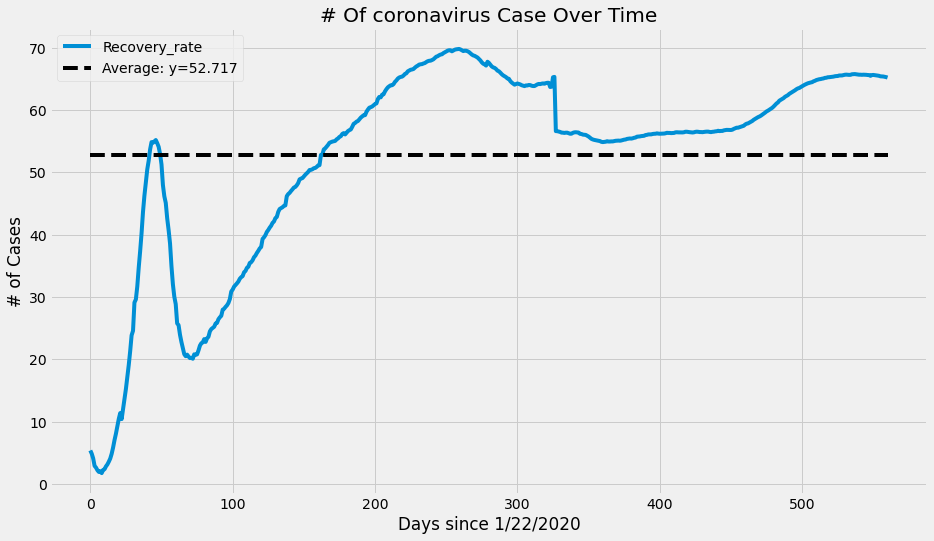

In [28]:
#Nhập code ở đây:

# Tạo dataframe chứa tỷ lệ hồi phục theo thời gian (đơn vị ngày)
df_72 = pd.DataFrame({'Recovery_rate':recovery_rate})

# Tạo thêm cột dữ liệu cho tỷ lệ hồi phục trung bình theo thời gian
   # Tên cột: name
name = str('Average: y='+ str(round(np.nanmean(df_72['Recovery_rate']),3)))
   # Thêm dữ liệu tỷ lệ tử vong trung bình vào cột:
df_72[name] = round(np.nanmean(df_72['Recovery_rate']),3)

# Vẽ biểu đồ đường gồm 2 đường thể hiện tỷ lệ hồi phục theo thời gian (đơn vị ngày) và tỷ lệ hồi phục trung bình theo thời gian
fig,ax = plt.subplots(figsize = (14,8))
ax.set_title('# Of coronavirus Case Over Time')
ax.set_ylabel('# of Cases')
ax.set_xlabel('Days since 1/22/2020')

df_72.plot.line(ax=ax, y=['Recovery_rate'])
df_72.plot.line(ax=ax, y=[name], linestyle='--', color='black')

plt.show()

#  6. Phân tích theo châu lục

## Tiền xử lý dữ liệu

In [29]:
# Thay đổi tên quốc gia theo yêu cầu của pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# nhận tất cả các quốc gia
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code thành Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Định nghĩa hàm để nhận continent code cho quốc gia.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


## Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [30]:
#Nhập code ở đây:

# Tạo list dữ liệu continent tương ứng với tên từng quốc gia trong confirmed_df
confirmed_df_cont=[]
for i in range(countries.shape[0]):
    confirmed_df_cont.append(continents[country_to_continent_code(countries[i])])
# Thêm cột 'continent' vào confirmed_df, cột thêm vào ở vị trí thứ 5
confirmed_df.insert(loc=4, column='continent', value=confirmed_df_cont)

# Tạo list dữ liệu continent tương ứng với tên từng quốc gia trong deaths_df
deaths_df_cont=[]
for i in range(countries1.shape[0]):
    deaths_df_cont.append(continents[country_to_continent_code(countries1[i])])
# Thêm cột 'continent' vào deaths_df, cột thêm vào ở vị trí thứ 5
deaths_df.insert(loc=4, column='continent', value=deaths_df_cont)

# Tạo list dữ liệu continent tương ứng với tên từng quốc gia trong recoveries_df
recoveries_df_cont=[]
for i in range(countries2.shape[0]):
    recoveries_df_cont.append(continents[country_to_continent_code(countries2[i])])
# Thêm cột 'continent' vào recoveries_df, cột thêm vào ở vị trí thứ 5
recoveries_df.insert(loc=4, column='continent', value=recoveries_df_cont)

confirmed_df.head()

Province/State Country/Region       Lat       Long continent  1/22/20  \
0            NaN    Afghanistan  33.93911  67.709953      Asia        0   
1            NaN        Albania  41.15330  20.168300    Europe        0   
2            NaN        Algeria  28.03390   1.659600    Africa        0   
3            NaN        Andorra  42.50630   1.521800    Europe        0   
4            NaN         Angola -11.20270  17.873900    Africa        0   

   1/23/20  1/24/20  1/25/20  1/26/20  ...  7/26/21  7/27/21  7/28/21  \
0        0        0        0        0  ...   144285   145008   145552   
1        0        0        0        0  ...   132891   132922   132952   
2        0        0        0        0  ...   163660   165204   167131   
3        0        0        0        0  ...    14577    14586    14586   
4        0        0        0        0  ...    41879    42110    42288   

   7/29/21  7/30/21  7/31/21  8/1/21  8/2/21  8/3/21  8/4/21  
0   145996   146523   147154  147501  147985  148572  148933  
1   132999   133036   133081  133121  133146  133211  133310  
2   168668   170189   171392  172564  173922  175229  176724  
3    14655    14678    14678   14678   14747   14766   14797  
4    42486    42646    42777   42815   42970   43070   43158  

[5 rows x 566 columns]

## Bài toán 9
    Tạo data frame country_df với chỉ mục là trường "Country/Region".
    Các cột thông tin này gồm:
    - continent: Châu lục.
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [31]:
#Nhập code ở đây:

# Tạo dataframe continent_df_9 chứa dữ liệu continent, có index là Country/Region
continent_df_9 = confirmed_df[['Country/Region','continent']].copy()
continent_df_9.drop_duplicates(subset=['Country/Region'],inplace=True)
continent_df_9.set_index('Country/Region',inplace=True)

# Tạo dataframe confirmed_df_9 chứa dữ liệu Total_confirmed, có index là Country/Region
confirmed_df_9 = confirmed_df.copy()
confirmed_df_9['Total_confirmed'] = confirmed_df_9.loc[:, cols[5]:cols[-1]].sum(axis=1)
confirmed_df_9 = confirmed_df_9.groupby('Country/Region')['Total_confirmed'].sum()

# Tạo dataframe deaths_df_9 chứa dữ liệu Total_deaths, có index là Country/Region
deaths_df_9 = deaths_df.copy()
deaths_df_9['Total_deaths'] = deaths_df_9.loc[:, cols[5]:cols[-1]].sum(axis=1)
deaths_df_9 = deaths_df_9.groupby('Country/Region')['Total_deaths'].sum()

# Tạo dataframe recoveries_df_9 chứa dữ liệu Total_recoveries, có index là Country/Region
recoveries_df_9 = recoveries_df.copy()
recoveries_df_9['Total_recoveries'] = recoveries_df_9.loc[:, cols[5]:cols[-1]].sum(axis=1)
recoveries_df_9 = recoveries_df_9.groupby('Country/Region')['Total_recoveries'].sum()

# Tạo dataframe country_df chứa dữ liệu Continent, Confirmed, Deaths, Recoveries, Active, Mortality Rate,
# có index là Country/Region

country_df = pd.concat([continent_df_9,confirmed_df_9,deaths_df_9,recoveries_df_9],axis=1)
country_df.rename(columns={'Total_confirmed':'Confirmed','Total_deaths':'Deaths','Total_recoveries':'Recoveries'},inplace=True)
country_df['Active'] = country_df['Confirmed'] - country_df['Deaths'] - country_df['Recoveries']
country_df['Mortality_rate'] = round(country_df['Deaths'] / country_df['Confirmed'] * 100,2)
country_df

continent  Confirmed   Deaths  Recoveries    Active  \
Country/Region                                                             
Afghanistan               Asia   24871446   999952    18289880   5581614   
Albania                 Europe   28653789   540428    22652652   5460709   
Algeria                 Africa   37405535  1088600    25670233  10646702   
Andorra                 Europe    3323233    40615     3085649    196969   
Angola                  Africa    7376501   176902     5895800   1303799   
...                        ...        ...      ...         ...       ...   
West Bank and Gaza      Others   62836711   679081    57608773   4548857   
Winter Olympics 2022    Others          0        0           0         0   
Yemen                     Asia    1425780   328553      772497    324730   
Zambia                  Africa   23692272   360877    21852796   1478599   
Zimbabwe                Africa   10734546   383912     8779035   1571599   

                      Mortality_rate  
Country/Region                        
Afghanistan                     4.02  
Albania                         1.89  
Algeria                         2.91  
Andorra                         1.22  
Angola                          2.40  
...                              ...  
West Bank and Gaza              1.08  
Winter Olympics 2022             NaN  
Yemen                          23.04  
Zambia                          1.52  
Zimbabwe                        3.58  

[201 rows x 6 columns]

## Bài toán 10
    Tạo data frame continents_df với chỉ mục là trường "continent".
    Các cột thông tin này gồm: 
    - Confirmed: Tổng số ca mắc.
    - Deaths: Tổng số ca tử vong.
    - Recoveries: Tổng số ca hồi phục.
    - Active: Tổng số ca còn mắc Covid.
    - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [32]:
#Nhập code ở đây:
# Định dạng dữ liệu lấy 2 số thập phân sau dấu chấm
# pd.options.display.float_format = '{:.2f}'.format

# Tạo dataframe continents_df
continents_df = country_df.groupby('continent')[['Confirmed','Deaths','Recoveries','Active']].sum()

# Thêm cột Tỷ lệ tử vong 'Mortality_rate'
continents_df['Mortality_rate'] = round(continents_df['Deaths'] / continents_df['Confirmed'] * 100,2)
continents_df

Confirmed     Deaths  Recoveries      Active  Mortality_rate
continent                                                                    
Africa          1272244657   32605407  1089946133   149693117            2.56
Asia           10280482726  157008953  9318184261   805289512            1.53
Australia         15301928     367898    11650490     3283540            2.40
Europe         10561665627  275161164  5406826124  4879678339            2.61
North America   9716864807  238241534  1610942101  7867681172            2.45
Others           127694607    2149382   113130276    12414949            1.68
South America   6698133372  216240607  5940776532   541116233            3.23

## Mẫu biểu đồ đường
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp mắc Covid theo thời gian ở mỗi lục địa/quốc gia:

In [33]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Vẽ Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Trục y
    plt.yscale(scale)
    plt.minorticks_on()
    # Vẽ các nhãn theo trục
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases_5(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ các nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ các tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend 
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        
def visualize_covid_cases_7(confirmed, deaths, recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths, recoveries]
    label = ["Confirmed", "Deaths", "Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Vẽ nhãn trục
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Vẽ tham số
    plot_params(ax,axis_label,scale = scale)
    
    # Vẽ Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Vị trí Legend
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()        


## Bài toán 11
**11.1** 

    Áp dụng hàm visual_covid_case để hiển thị trực quan hóa của 7 lục địa trong 7 biểu đồ đường riêng biệt. Thứ tự của các trực quan hóa được sắp xếp theo thứ tự giảm dần theo số ca mắc được xác nhận. 
    

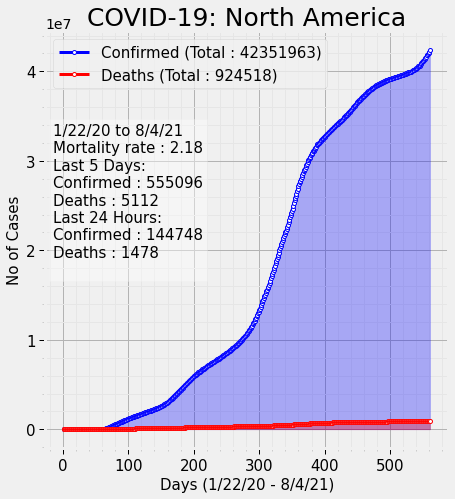

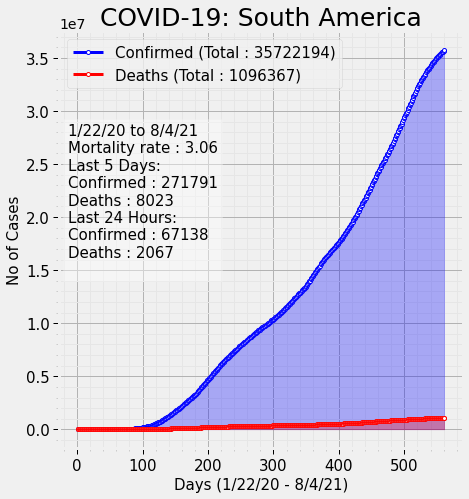

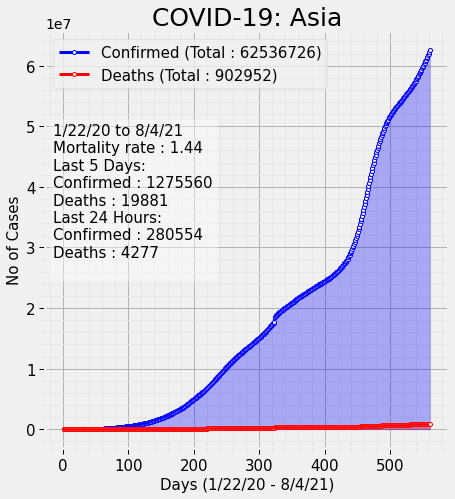

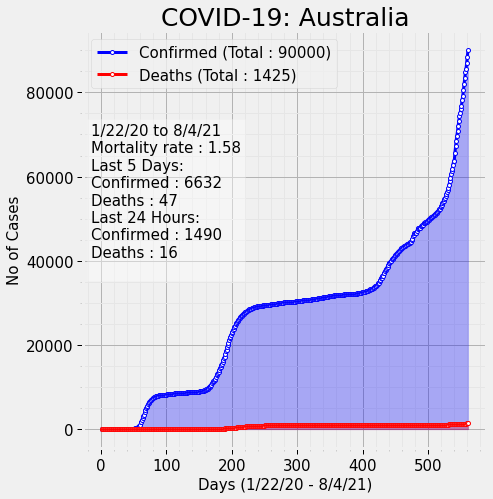

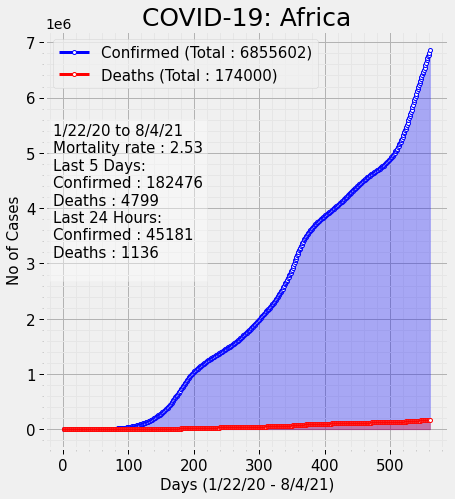

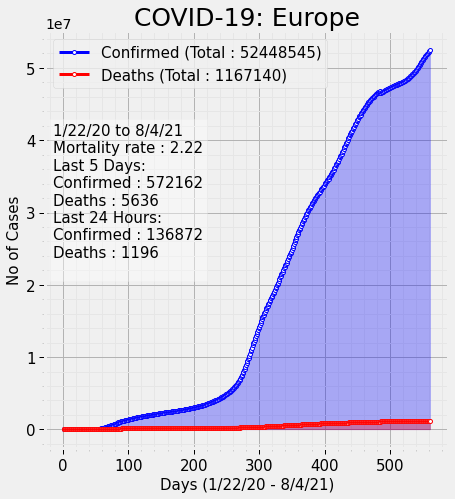

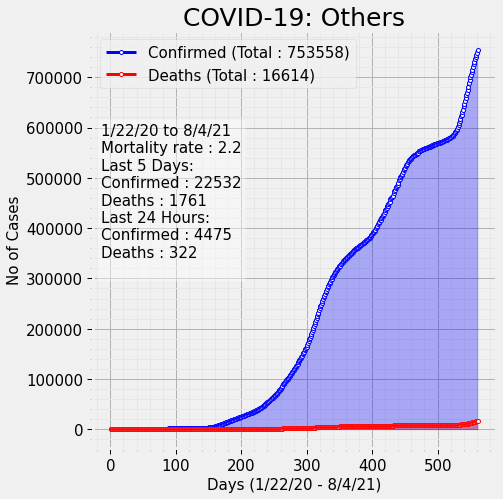

In [34]:
#Nhập code ở đây:

for key in continents:
    visualize_covid_cases_5(confirmed_df, deaths_df, continents[key])


**11.2**

    Sửa đổi hàm "plot_params" và "visual_covid_case" thành:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
    - Thêm "Recoveries line" vào biểu đồ chính.
    - Thêm số "Total Recoveries" vào bảng nhỏ
    - Thêm "Recoveries" được điền trong 7 ngày và 24 giờ qua vào menu thông tin.

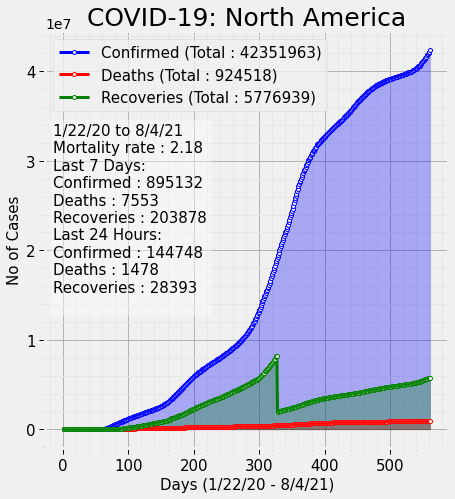

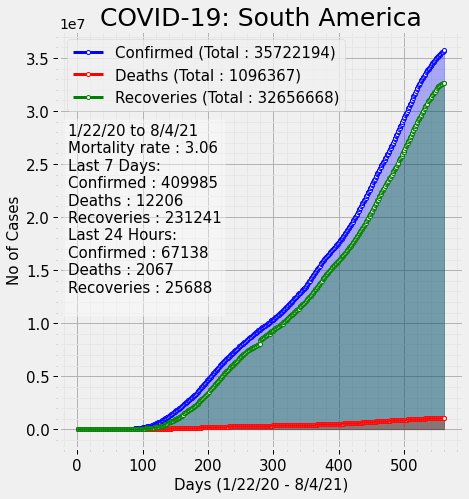

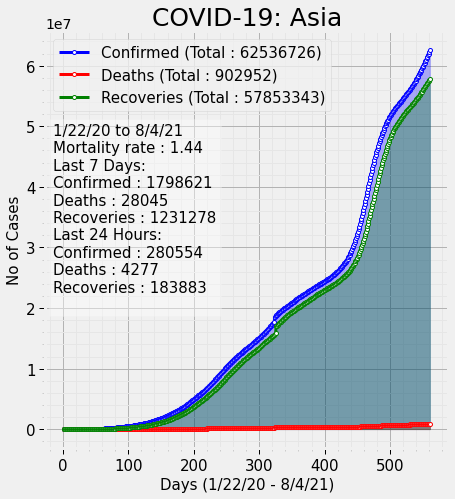

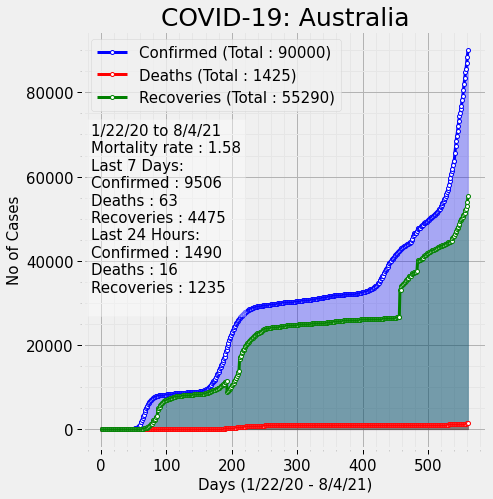

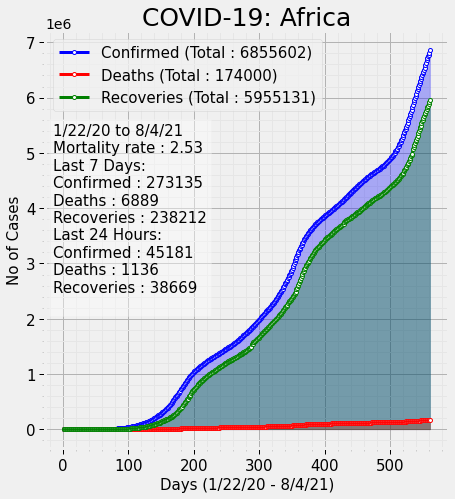

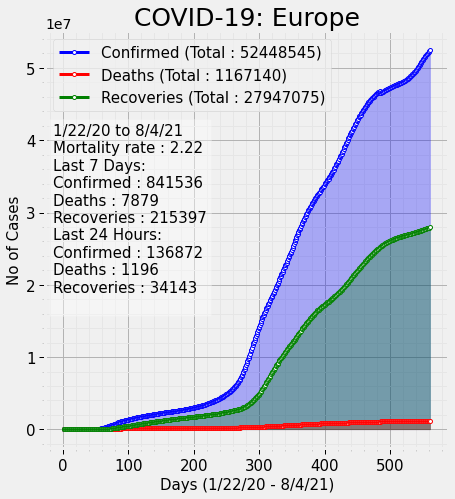

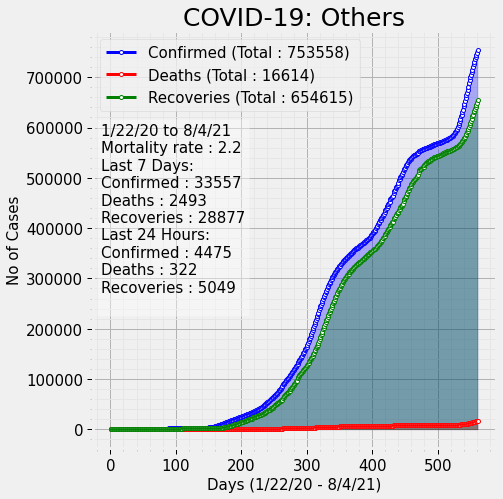

In [35]:
#Nhập code ở đây:

for key in continents:
    visualize_covid_cases_7(confirmed_df, deaths_df, recoveries_df, continents[key])

## Bài toán 12
    Trực quan hóa ma trận hiệp phương sai cho continents_df.

<AxesSubplot:>

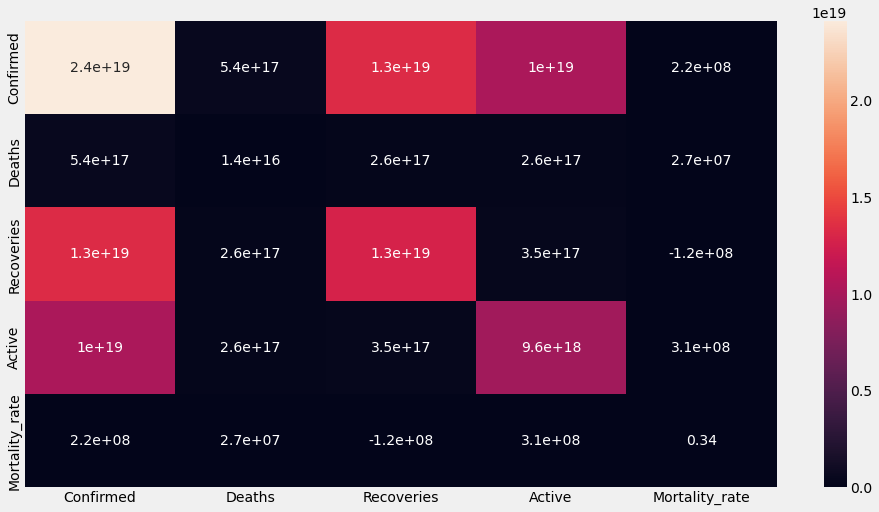

In [36]:
#Nhập code ở đây:

f, ax = plt.subplots(figsize=(15,8))

# Tính hiệp phương sai theo cặp của các cột trong continents_df
cov = continents_df.cov()

# Trực quan hóa ma trận hiệp phương sai cho continents_df
sns.heatmap(cov,annot=True)

## Bài toán 13
    Xây dựng biểu đồ tròn để so sánh tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi và số ca vẫn còn mắc của 7 châu lục.
    Mỗi trường (confirm, deaths, ...) nên được trình bày trong các biểu đồ tròn khác nhau.
    Bạn không được sử dụng đoạn code lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi châu lục nên được trình bày bằng các màu sắc khác nhau.

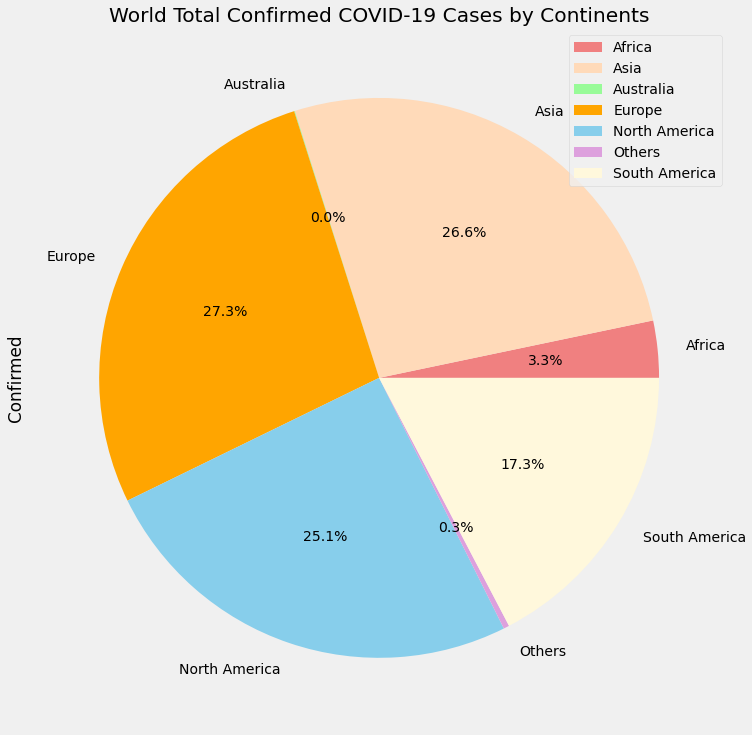

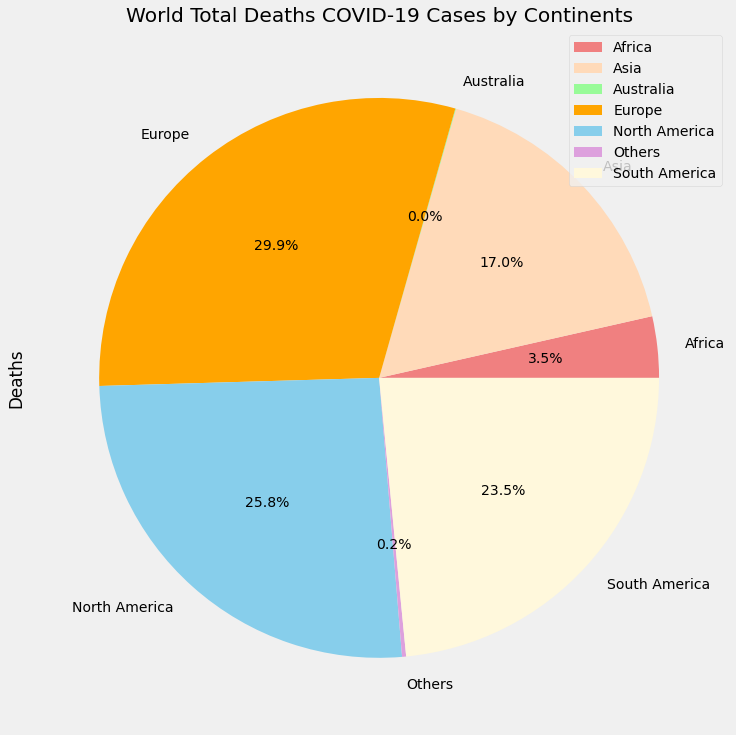

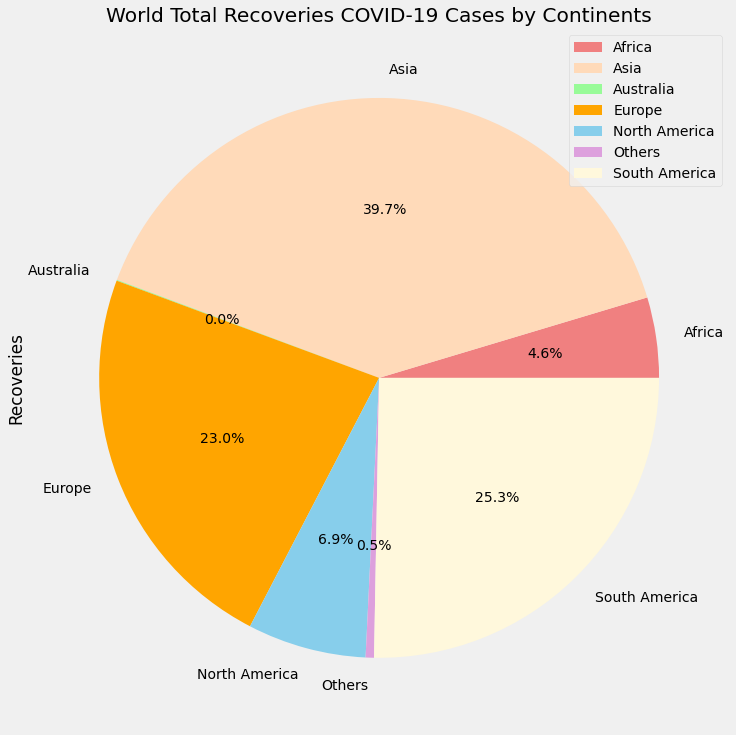

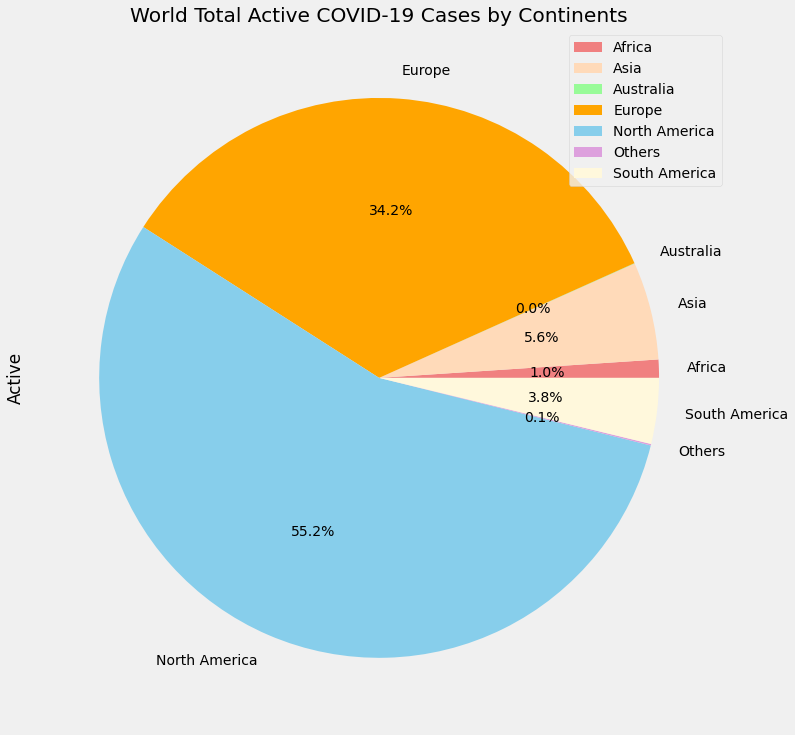

In [37]:
#Nhập code ở đây:

# Tạo list_case chứa tên các biến cần vẽ: 'Confirmed', 'Deaths', 'Recoveries', 'Active'
list_case = continents_df.columns.tolist()[:-1]

# Tạo list 7 màu cho 7 châu lục
colors = ['lightcoral','peachpuff','palegreen','orange','skyblue','plum','cornsilk']

# Vẽ biểu đồ tròn thể hiện tỷ lệ số ca mắc được xác nhận, số ca tử vong, số ca phục hồi, số ca vẫn còn mắc Covid của 7 châu lục
for i in list_case:
    continents_df[i].plot(kind='pie', figsize=(20,12), autopct='%1.1f%%', colors=colors, legend=True)
    plt.title('World Total '+ i + ' COVID-19 Cases by Continents')
    plt.show()

# 7. Phân tích theo quốc gia

## Bài toán 14
    Xây dựng bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của vòng tròn tỷ lệ thuận với số ca được xác nhận.


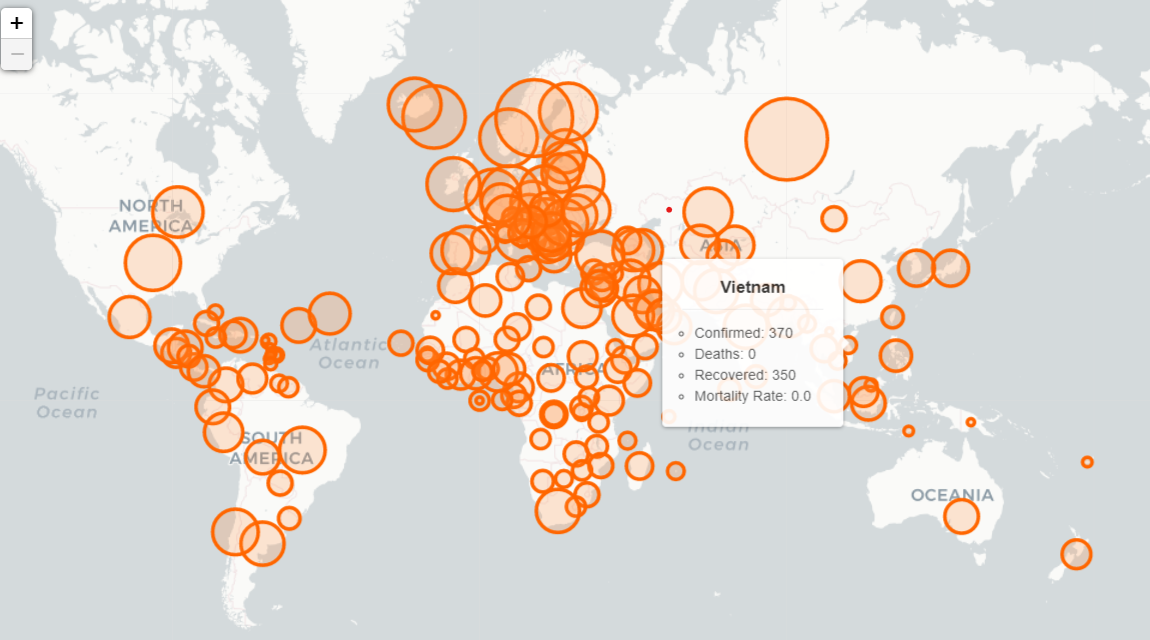

In [38]:
#Nhập code ở đây:

# Tạo dataframe location_df chứa thông tin Lat và Long, index là Country/Region
location_df = confirmed_df.groupby('Country/Region').mean().iloc[:,:2]

# Tạo dataframe df_14 kết hợp từ country_df và location_df
df_14 = pd.concat([location_df,country_df],axis=1)

# Vẽ bản đồ folium để hiển thị số ca được xác nhận, số ca tử vong, số ca phục hồi và tỷ lệ tử vong của mỗi quốc gia
map_14 = folium.Map(location=[0, 0],zoom_start=2)

# Tạo data_group chứa dữ liệu sẽ được thêm vào
data_group = folium.map.FeatureGroup()

# Lặp qua từng dòng trong dataframe df_14
for i in range(len(df_14.index)):
    # Tạo popup_text để hiển thị thông tin popup trên bản đồ
    popup_text = '{}<br> Confirmed: {:,}<br> Deaths: {:,}<br> Recoveries: {:,}<br> Mortality Rate: {:,}'
    popup_text = popup_text.format(
        df_14.index[i], 
        df_14.iloc[i]['Confirmed'], 
        df_14.iloc[i]['Deaths'], 
        df_14.iloc[i]['Recoveries'], 
        df_14.iloc[i]['Mortality_rate']
    )
    # Thêm thông tin vòng tròn sẽ vẽ cho từng quốc gia
    data_group.add_child(folium.Circle(location=[df_14.iloc[i]['Lat'],df_14.iloc[i]['Long']],
                                      radius = df_14.iloc[i]['Confirmed']/2000,
                                      color='orange',
                                      popup=popup_text,
                                      fill=True,
                                      opacity=1,
                                      fillopacity=0.9,
                                      fill_color='orange'))

# Hiển thị bản đồ
map_14.add_child(data_group)
map_14

## Bài toán 15
Xây dựng bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia bằng cách sử dụng màu "quang phổ".

In [39]:
#Nhập code ở đây:

# Tạo dataframe map_df từ country_df reset lại index
map_df = country_df.reset_index()

# Tạo biến 'name' chứa tên của cột index mới reset
name = map_df.keys()[0]

# Tạo dictionary chứa thông tin các quốc gia, với key là tên quốc gia với ISO 3166-1 values Alpha 2, Alpha 3, and Numeric
# từ hàm map_countries() của country_mappings
dict_countries = cm.map_countries()

# Tạo list alpha3 để nhập code alpha 3 của các quốc gia vào
alpha3 = []

# Lặp qua từng dòng trong map_df, thêm dữ liệu alpha 3 tương ứng với các quốc gia từ dict_countries
for i in range(len(map_df.index)):
    country = map_df.iloc[i,0]
    try:
        if country == 'Holy See':
            alpha3.append('VAT')
        elif country == 'USA':
            alpha3.append('USA')
        else:
            alpha3.append(dict_countries[country]['alpha_3'])
    except:
        alpha3.append(np.nan)
        print('iso alpha_3 not found:' + country)

# Thêm cột 'iso_alpha' vào dataframe map_df
map_df['Iso_alpha'] = alpha3

# Thêm cột 'Color' vào dataframe map_df
map_df['Color'] = np.log10(map_df['Active'])

# Vẽ bản đồ plotly.express để hiển thị số ca còn mắc Covid của mỗi quốc gia trong log(10) dựa trên tên các quốc gia
fig=px.choropleth(map_df,locations='Iso_alpha',
                  color='Color',
                  hover_data=['Active',name],
                  color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

iso alpha_3 not found:Burma
iso alpha_3 not found:Diamond Princess
iso alpha_3 not found:Korea, North
iso alpha_3 not found:Kosovo
iso alpha_3 not found:MS Zaandam
iso alpha_3 not found:Summer Olympics 2020
iso alpha_3 not found:West Bank and Gaza
iso alpha_3 not found:Winter Olympics 2022


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log10



## Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca được xác nhận.

In [40]:
#Nhập code ở đây:

df_16 = country_df.sort_values('Confirmed',ascending=False).head(10)
df_16

continent   Confirmed     Deaths  Recoveries      Active  \
Country/Region                                                                 
USA             North America  8343999836  163218805   496971828  7683809203   
India                    Asia  5260008892   70816966  4859387857   329804069   
Brazil          South America  3896694015  107386189  3412350387   376957439   
Russia                 Europe  1302404643   27484772  1128064202   146855669   
France                 Europe  1249919168   30171452    96506536  1123241180   
United Kingdom         Europe  1120762324   47507182     3447801  1069807341   
Turkey                   Asia   984443593   10172619   919259007    55011967   
Italy                  Europe   922928121   34539038   759237934   129151149   
Spain                  Europe   913852439   24481926    71183831   818186682   
Argentina       South America   803604713   18414691   711610324    73579698   

                Mortality_rate  
Country/Region                  
USA                       1.96  
India                     1.35  
Brazil                    2.76  
Russia                    2.11  
France                    2.41  
United Kingdom            4.24  
Turkey                    1.03  
Italy                     3.74  
Spain                     2.68  
Argentina                 2.29

## Bài toán 17
    Trực qua hóa 10 quốc gia được xác nhận hàng đầu với số ca vẫn còn mắc Covid, phục hồi và tử vong bằng cách sử dụng biểu đồ thanh xếp chồng lên nhau.

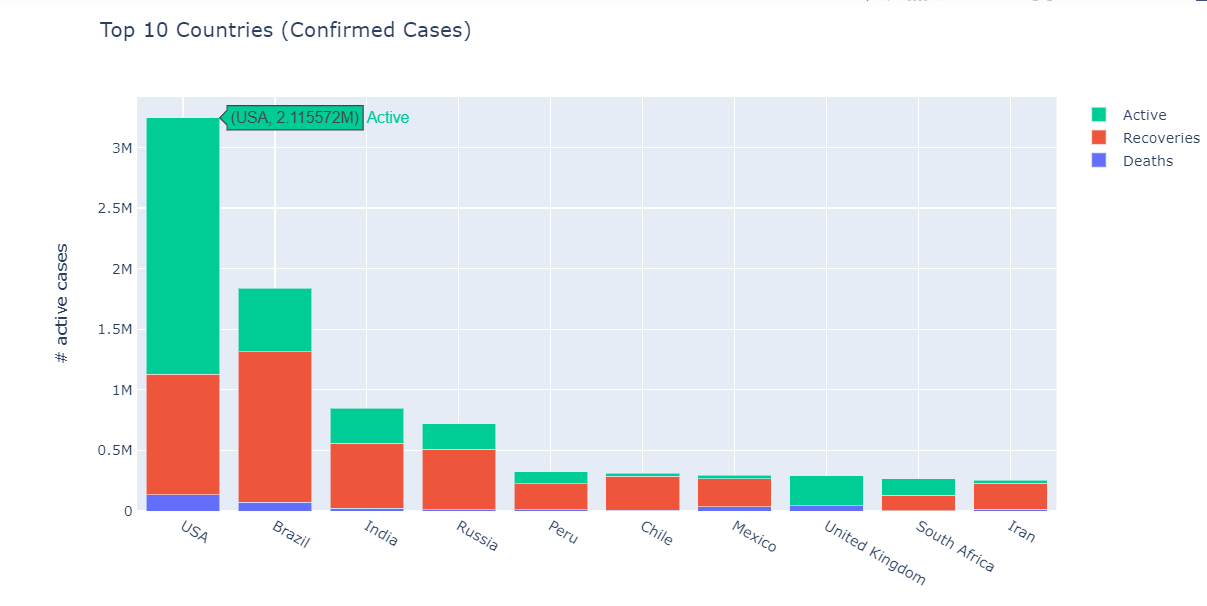

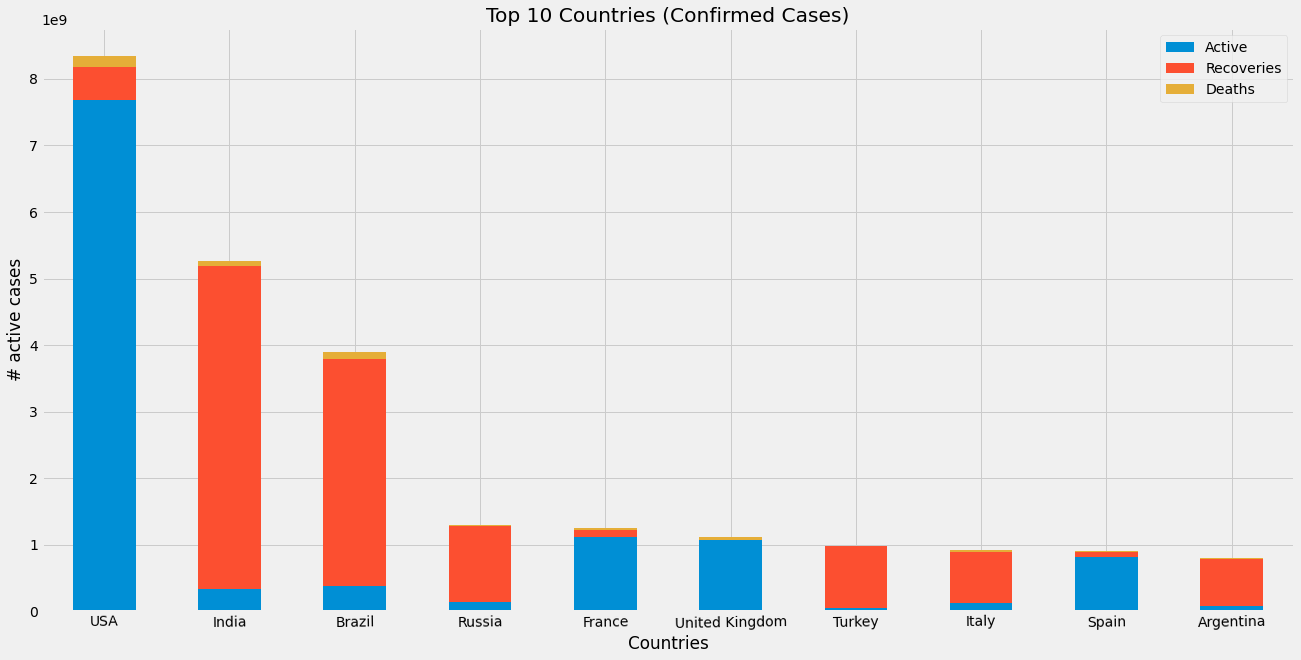

In [41]:
#Nhập code ở đây:

df_16[['Active','Recoveries','Deaths']].plot(kind='bar', stacked=True, rot=1, figsize=(20,10))
plt.title('Top 10 Countries (Confirmed Cases)')
plt.ylabel('# active cases')
plt.xlabel('Countries')
plt.show()

# 8. Phân tích nâng cao
 

## Bài toán 18
    Dựa trên dữ liệu trực quan toàn cầu, đại dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Bạn hãy trả lời ở đây:


<b>Trả lời :</b>
- Đại dịch COVID 2019 trên thế giới chưa đạt tới đỉnh điểm vì dựa vào Biểu đồ tổng số lượng ca nhiễm mới, ca tử vong, ca hồi phục (bài toán 2) và Biểu đồ số lượng gia tăng hàng ngày về tổng số ca mắc Covid, tổng số ca tử vong, tổng số ca phục hồi và tổng số ca còn mắc Covid theo thời gian đơn vị ngày (bài toán 5): đều cho thấy số lượng ca nhiễm mới, ca tử vong, ca hồi phục vẫn đang có xu hướng gia tăng dần, chưa đạt đỉnh.

## Bài toán 19
Dựa trên trực quan hóa dữ liệu của châu lục:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất theo các ca mắc của châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất theo số ca mắc của châu lục?
    
    19.3 Châu lục nào có tỷ lệ phục hồi cao nhất trong tập dữ liệu của các châu lục?

(Lưu ý: Tỷ lệ lan truyền COVID 2019 = Số lượng các ca mới được xác nhận trong 10 ngày qua / số ca mắc trước đó).
Bạn hãy trả lời ở đây:

In [42]:
# Tạo dataframe df_19 từ confirmed_df
df_19 = confirmed_df.copy()

# Thêm cột 'confirmed_last10days' chứa dữ liệu tổng số ca nhiễm trong 10 ngày gần nhất
df_19['confirmed_last10days'] = confirmed_df.loc[:,cols[-10]:cols[-1]].sum(axis=1)

# Thêm cột 'confirmed_previousdays' chứa dữ liệu tổng số ca nhiễm trước 10 ngày gần nhất
df_19['confirmed_previousdays'] = confirmed_df.loc[:,cols[5]:cols[-11]].sum(axis=1)

# Tạo dataframe df_19_groupby_continent chứa dữ liệu 'confirmed_last10days' và 'confirmed_previousdays' groupby 'continent'
df_19_groupby_continent = df_19.groupby('continent')[['confirmed_last10days','confirmed_previousdays']].sum()

# Thêm cột 'Spread_rate' chứa dữ liệu tỷ lệ lây lan Covid của từng châu lục
df_19_groupby_continent['Spread_rate'] = df_19_groupby_continent['confirmed_last10days']/df_19_groupby_continent['confirmed_previousdays']

print('Trả lời:')
print('19.1: Châu lục có tỷ lệ tử vong cao nhất: ',continents_df['Mortality_rate'].idxmax())
print('19.2: Châu lục có tỷ lệ lây lan COVID 2019 cao nhất:', df_19_groupby_continent['Spread_rate'].idxmax())
print('19.3: Châu lục có tỷ lệ phục hồi cao nhất: ', (continents_df['Recoveries']/continents_df['Confirmed']).idxmax())

Trả lời:
19.1: Châu lục có tỷ lệ tử vong cao nhất:  South America
19.2: Châu lục có tỷ lệ lây lan COVID 2019 cao nhất: Asia
19.3: Châu lục có tỷ lệ phục hồi cao nhất:  Asia


## Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1 Quốc gia nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lây lan COVID 2019 cao nhất theo với tập dữ liệu của các quốc gia?
     
    20.3 Quốc gia nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia?
Bạn hãy trả lời ở đây:
<p><b>Trả lời:</b></p>

In [43]:
# Tạo dataframe df_20_groupby_CountryRegion chứa dữ liệu 'confirmed_last10days','confirmed_previousdays' groupby 'Country/Region'
df_20_groupby_CountryRegion = df_19.groupby('Country/Region')[['confirmed_last10days','confirmed_previousdays']].sum()

# Thêm cột 'Spread_rate' chứa dữ liệu tỷ lệ lây lan Covid của từng quốc gia/vùng
df_20_groupby_CountryRegion['Spread_rate'] = df_20_groupby_CountryRegion['confirmed_last10days']/df_20_groupby_CountryRegion['confirmed_previousdays']

print('20.1 Quốc gia có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia: ', country_df['Mortality_rate'].idxmax())
print('20.2 Quốc gia có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các quốc gia: ', df_20_groupby_CountryRegion['Spread_rate'].idxmax())
print('20.3 Quốc gia có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia: ', (country_df['Recoveries']/country_df['Confirmed']).idxmax())

20.1 Quốc gia có tỷ lệ tử vong cao nhất theo tập dữ liệu của các quốc gia:  Yemen
20.2 Quốc gia có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các quốc gia:  Summer Olympics 2020
20.3 Quốc gia có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các quốc gia:  Micronesia


## Bài toán 21
**USA dataset**

In [44]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên USA dataset:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang?

    21.2 Tiểu bang nào có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang?

In [45]:
#Nhập code ở đây:
print('21.1 Tiểu bang có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang: ', us_medical_data['Province_State'].loc[us_medical_data['Mortality_Rate'].idxmax()])
print('21.2 Tiểu bang có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang: ', us_medical_data['Province_State'].loc[us_medical_data['Incident_Rate'].idxmax()])
print('21.3 Tiểu bang có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang: ', us_medical_data['Province_State'].loc[(us_medical_data['Recovered']/us_medical_data['Confirmed']).idxmax()])

21.1 Tiểu bang có tỷ lệ tử vong cao nhất theo tập dữ liệu của các tiểu bang:  Connecticut
21.2 Tiểu bang có tỷ lệ lây lan COVID 2019 cao nhất theo tập dữ liệu của các tiểu bang:  New York
21.3 Tiểu bang có tỷ lệ hồi phục cao nhất theo tập dữ liệu của các tiểu bang:  Minnesota


## Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số ca mắc Covid được xác nhận mới ở 10 bang hàng đầu có số ca mắc được xác nhận cao nhất ở Hoa Kỳ.

In [46]:
#Nhập code ở đây:

# Tạo dataframe df_22 chứa thông tin của 10 bang ở hoa Kỳ có số ca nhiễm cao nhất
df_22 = us_medical_data.copy()
df_22 = df_22.sort_values('Confirmed',ascending=False).head(10)
df_22

Province_State Country_Region          Last_Update      Lat     Long_  \
36       New York             US  2020-07-07 04:34:13  42.1657  -74.9481   
5      California             US  2020-07-07 04:34:13  36.1162 -119.6816   
11        Florida             US  2020-07-07 04:34:13  27.7663  -81.6868   
49          Texas             US  2020-07-07 04:34:13  31.0545  -97.5635   
34     New Jersey             US  2020-07-07 04:34:13  40.2989  -74.5210   
17       Illinois             US  2020-07-07 04:34:13  40.3495  -88.9861   
25  Massachusetts             US  2020-07-07 04:34:13  42.2302  -71.5301   
3         Arizona             US  2020-07-07 04:34:13  33.7298 -111.4312   
12        Georgia             US  2020-07-07 04:34:13  33.0406  -83.6431   
43   Pennsylvania             US  2020-07-07 04:34:13  40.5908  -77.2098   

    Confirmed  Deaths  Recovered    Active  FIPS  ...  Total_Test_Results  \
36     397649   32057    71040.0  294552.0    36  ...           4288131.0   
5      284348    6369        NaN       NaN     6  ...                 NaN   
11     206447    3778        NaN       NaN    12  ...                 NaN   
49     204710    2891   103782.0   97880.0    48  ...                 NaN   
34     174766   15229    30729.0  128808.0    34  ...                 NaN   
17     147865    7026        NaN       NaN    17  ...                 NaN   
25     110137    8198    93157.0    8782.0    25  ...           1168234.0   
3      101455    1829    11836.0   87790.0     4  ...                 NaN   
12      97064    2878        NaN       NaN    13  ...                 NaN   
43      94439    6762    70437.0   17240.0    42  ...                 NaN   

    People_Hospitalized  Case_Fatality_Ratio         UID  ISO3  Testing_Rate  \
36              89995.0                  NaN  84000036.0   USA  22042.910293   
5                   NaN                  NaN  84000006.0   USA  12131.316935   
11              16352.0                  NaN  84000012.0   USA  16572.504822   
49                  NaN                  NaN  84000048.0   USA   7462.194372   
34              20237.0                  NaN  84000034.0   USA  17441.745786   
17                  NaN                  NaN  84000017.0   USA  14078.181818   
25              11469.0                  NaN  84000025.0   USA      0.000002   
3                5188.0                  NaN  84000004.0   USA   8488.322873   
12              11919.0                  NaN  84000013.0   USA   9031.880900   
43                  NaN                  NaN  84000042.0   USA   6509.332261   

    Hospitalization_Rate        Date People_Tested  Mortality_Rate  
36             22.631768  2020-07-06     4288131.0        8.061632  
5                    NaN  2020-07-06     4793353.0        2.233000  
11              7.920677  2020-07-06     3559399.0        1.830010  
49                   NaN  2020-07-06     2163729.0        1.404168  
34             11.656519  2020-07-06     1549209.0        8.713937  
17                   NaN  2020-07-06     1783962.0        4.751632  
25             10.413394  2020-07-06      899417.0        7.443457  
3               5.113597  2020-07-06      873294.0        1.802770  
12             12.279527  2020-07-06      958953.0        2.965054  
43                   NaN  2020-07-06     1018320.0        7.160177  

[10 rows x 21 columns]